In [1]:
# Dependencies
import requests as req
import json
import zipcodes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import http.client
import datetime
import zip_functions as zf
import csv

In [2]:
#read zip code file and verify the zip is valid
all_zips = pd.read_csv("Resources/free-zipcode-database-Primary.csv")

In [3]:
# get latitude and longitude of target zipcode for use with google places
target_zip = input("Which zipcode would you like to score? ")
invalid_zip = True

#make sure the zip code is in the valid zip code file
while invalid_zip == True:
    if any(all_zips["Zipcode"] == int(target_zip)):

        invalid_zip = False

    else:
        print("That is not a valid zip code")
        target_zip = input("Please try a new, nearby zipcode ")


lat = zipcodes.matching(target_zip)[0]["lat"]
lng = zipcodes.matching(target_zip)[0]["long"]
city = zipcodes.matching(target_zip)[0]["city"]
state = zipcodes.matching(target_zip)[0]["state"]

Which zipcode would you like to score? 85018


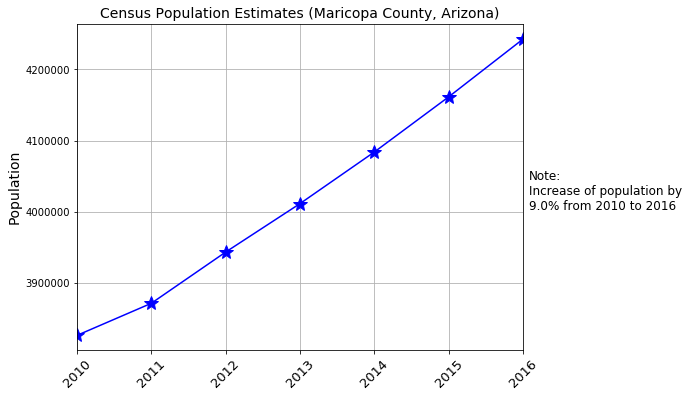

In [4]:
# Use the census data to determine population growth for zip codes
pop_est,county_name,state_name = zf.cen_block_query(lat,lng)
pop_growth = zf.census_plot(pop_est,county_name,state_name)

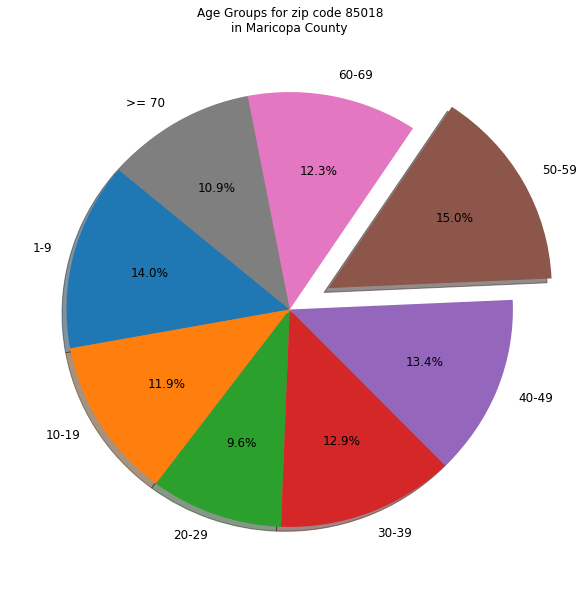

In [5]:
# get and plot the community data and age demographics
resp = zf.get_community_data(target_zip)
county = zf.age_demographics_zip(resp,target_zip)

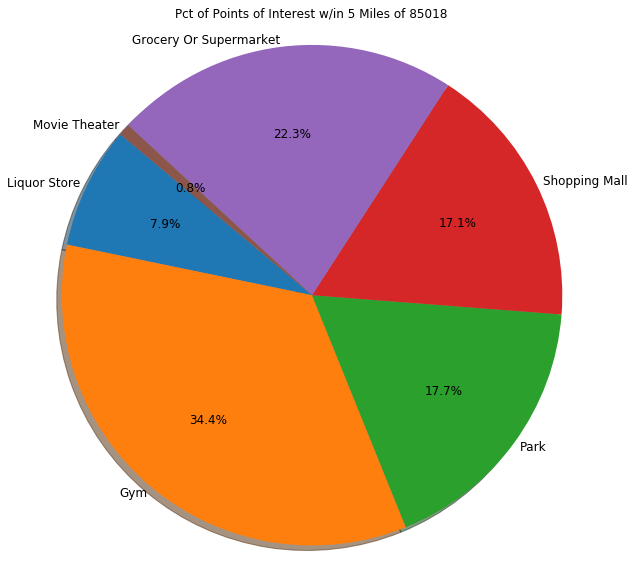

In [6]:
# run the pie_plot function to graph points of interest
# poi is the return dictionary of results from the barfinder function
poi = zf.barfinder(lat,lng)
poi_total = sum(poi.values())
zf.pie_plot(poi, target_zip)

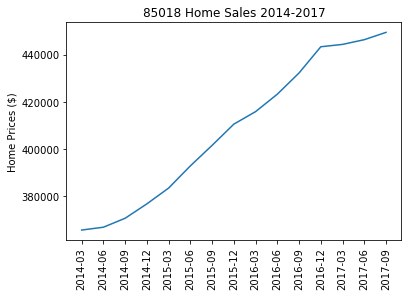

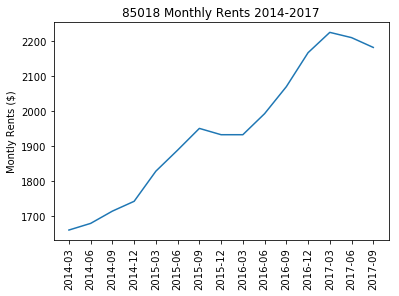

Market Health: 2.86606572503
Walkability and Bikability Scores: 36: Car-Dependent, 69: Bikeable
Average Winter Temperature (F): 54.20
Average Summer Temperature (F): 92.80

Number of Schools
private: 20, public: 72, catholic: 5, other: 0


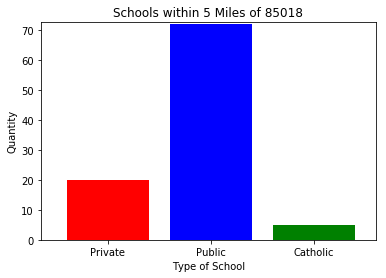

Breakdown of Total Score for 85018

Average Home Value: 1.0/5 | Average Rent: 3.0/5 | Real Estate Market Health: 1.43/5
Average Winter Temp (F): 5.0/5 | Average Summer Temp (F): 1.0/5
Total Schools: 3.47/10 | Total Points of Interest: 20.0/30
Population Growth: 5.0/10
Sales Tax Rate: 1.0/5
Walkability: 1.8/5
Crime Risk: 5.0/15

CitySlip Score (0-100): 47.71


In [7]:
#create the factors dictionary 
zip_factors_dict = {}


#get Real Estate data 
df, periods, zip_factors_dict['home_value'], zip_factors_dict['rent'], found = zf.get_home_data(target_zip, city, state)

#plot the home values and rent
zf.plot_homes(df,target_zip,periods, found)

#get more data for the zip code and store in the dictionary
zip_factors_dict = zf.get_zip_factors(target_zip,lat, lng, zip_factors_dict)    

#get school data
radius = 5
#total schools, private, public, catholic
ts, pv, pub, ca = zf.get_school_data(lat, lng, radius)

# plot the school data
zf.plot_schools(pv, pub, ca, radius, target_zip)

#store results in factors dictionary
zip_factors_dict["private_schools"] = pv
zip_factors_dict["public_schools"] = pub
zip_factors_dict["cath_schools"] = ca


#get other factors from census and google
#### NEED TO CALL THOSE FUNCTIONS AND POPULATE the DICTIONARY WITH REAL VALUES
zip_factors_dict['pop_growth'] = pop_growth
zip_factors_dict['poi'] = poi_total
zip_factors_dict['city'] = city
zip_factors_dict['state'] = state
zip_factors_dict['county'] = county
zip_factors_dict['zip_code'] = target_zip

#compute the score from the values in the dictionary
score = zf.compute_score(zip_factors_dict)